# **Breast Cancer Classification: Logistic Regression vs. Linear Regression**

#**Logistic Regression vs. Linear Regression**



The objective of this project is to perform the predictive modeling techniques on the breast cancer Wisconsin dataset to classify tumors as benign or malignant based on various features.




**Technique 1: Linear regression**

Linear regression is a supervised learning algorithm that models the relationship between a set of independent variables (i.e features) and a continuous dependent variable (i.e target variable). It predicts a continuous value based on the features.
Linear regression is used to analyze the relationship between a specific feature and other features.








**Technique 2: Logistic regression**

Logistic regression is also a supervised learning algorithm, it is specifically designed for classification tasks. It models the relationship between features and a binary dependent variable (target variable with two categories). It predicts the probability of an observation belonging to a specific class.
In this project, logistic regression plays a central role. It's ideal for classifying tumors as malignant (positive class) or benign (negative class) based on the extracted features. The model estimates the probability of a tumor being malignant, which can be a valuable tool in risk assessment.








In this breast cancer project, both linear regression and logistic regression play complementary roles. Linear regression helps analyze relationships between features, while logistic regression is used for classifying tumors based on their features.

METHODOLOGY

-Data Preparation

-Data Exploration

-Data Preprocessing

-Data Visualization

-Model Building

-Model Evaluation

-Results and Conclusion


The ucimlrepo package in python to fetch the required dataset for our project.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
#Install required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [ ]:
# Fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

## Data Exploration

The dataset was explored to understand its structure, variable information, and metadata. This step involved examining the distribution of features and the target variable to gain insights into the data.

In [ ]:
# Display variable information
print("Variable Information:")
print(breast_cancer_wisconsin_original.variables)

Variable Information:
                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None        

In [ ]:
# Display metadata
print("Metadata:")
print(breast_cancer_wisconsin_original.metadata)

Metadata:
{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been r

In [ ]:
# Check the first few rows of the dataset
print(X.head())
print(y.head())

   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

In [ ]:
print(X.shape)
print(y.shape)

(699, 9)
(699, 1)


## Data Preprocessing

Data preprocessing steps were carried out, including handling missing values using imputation and feature scaling using standardization to ensure uniformity in feature scales.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Feature scaling using standardization to ensure uniformity
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

## Data Visualization

Dataset was visualized through histograms, scatter plots, and a correlation matrix to identify patterns, relationships between features, and correlations among variables.

These histograms provide a visual representation of the distribution of each feature in the dataset.

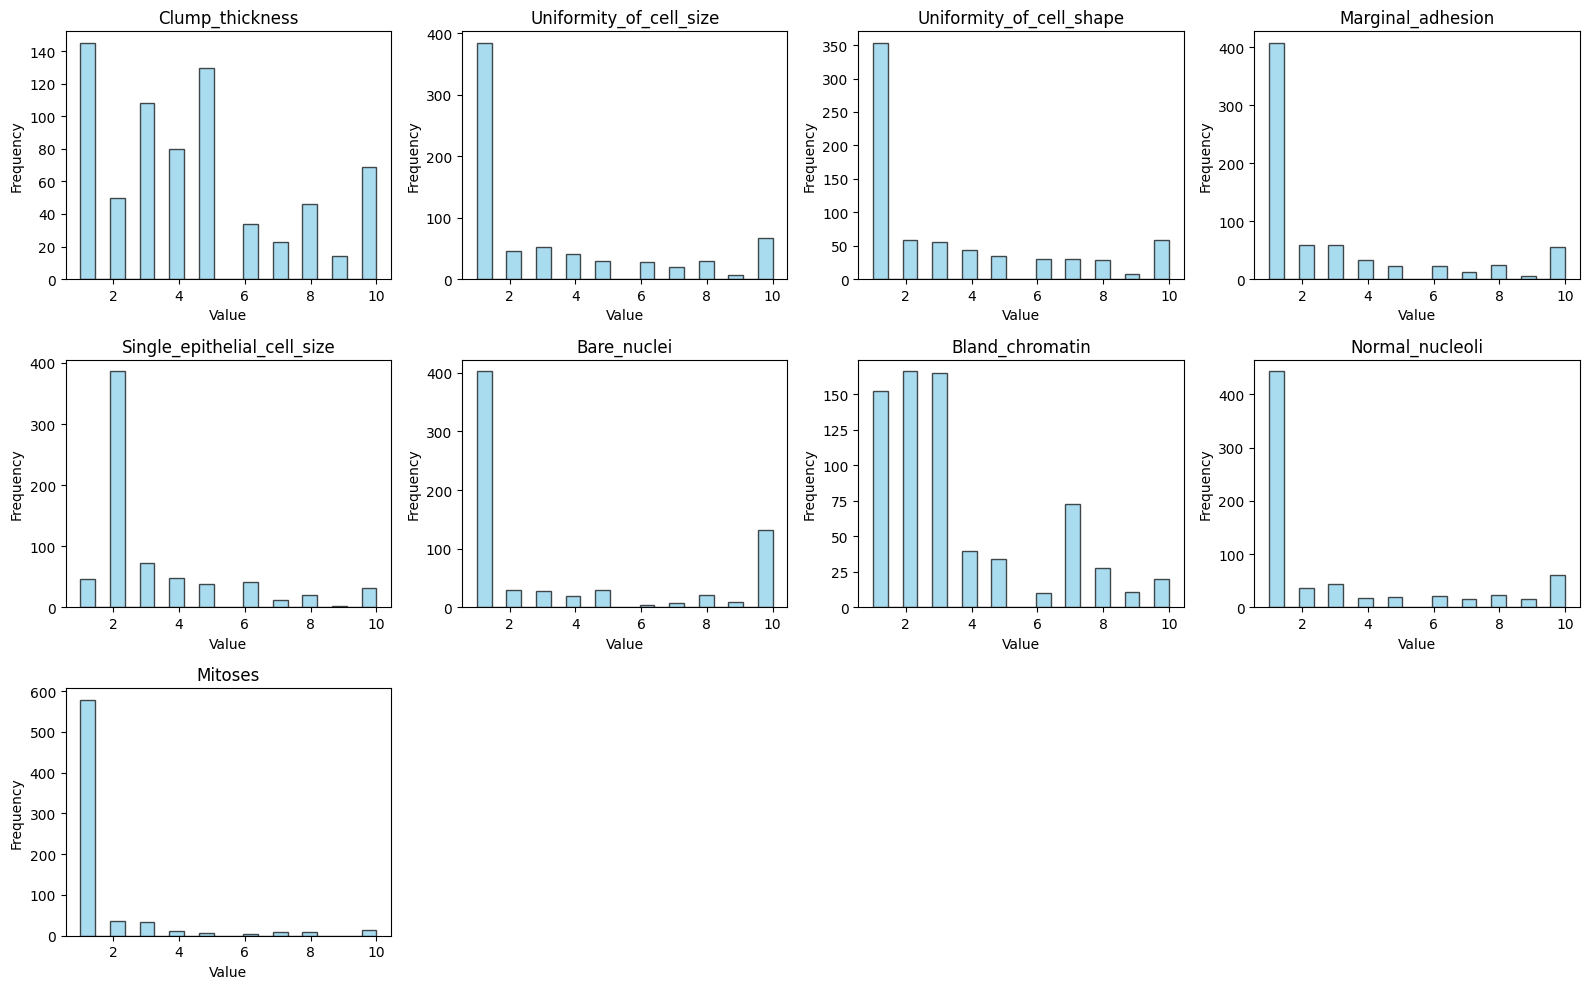

In [ ]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, col in enumerate(X.columns):
    ax = axes[i]
    ax.hist(X[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(X.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Scatter plots for visualizing the relationship between pairs of features.

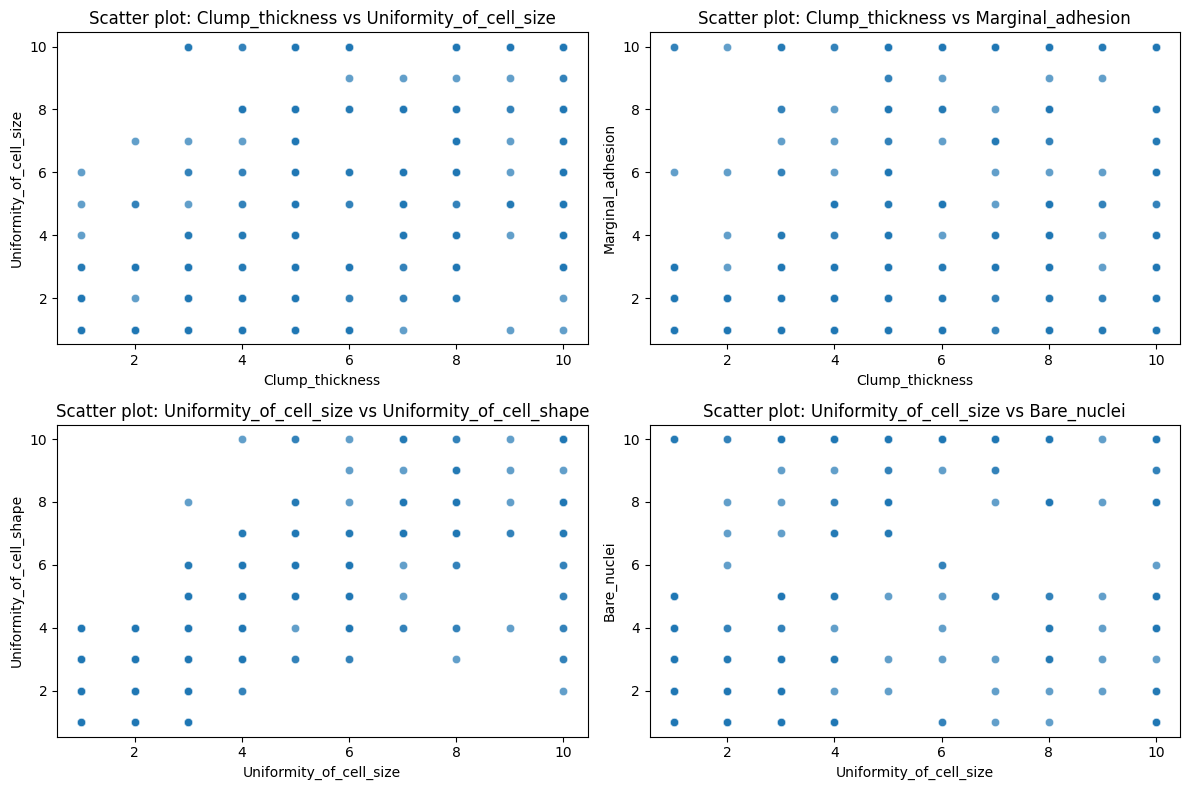

In [ ]:
# Selecting pairs of features for scatter plots
scatter_pairs = [('Clump_thickness', 'Uniformity_of_cell_size'),
                 ('Clump_thickness', 'Marginal_adhesion'),
                 ('Uniformity_of_cell_size', 'Uniformity_of_cell_shape'),
                 ('Uniformity_of_cell_size', 'Bare_nuclei')]

# Creating scatter plots
plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(scatter_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=X, x=x, y=y, alpha=0.7)
    plt.title(f'Scatter plot: {x} vs {y}')

plt.tight_layout()
plt.show()

A correlation matrix is a table that shows the correlation coefficients between variables in a dataset. Correlation coefficients measure the strength and direction of the linear relationship between two variables.
By visualizing the correlation matrix, we can identify which features are highly correlated with each other.

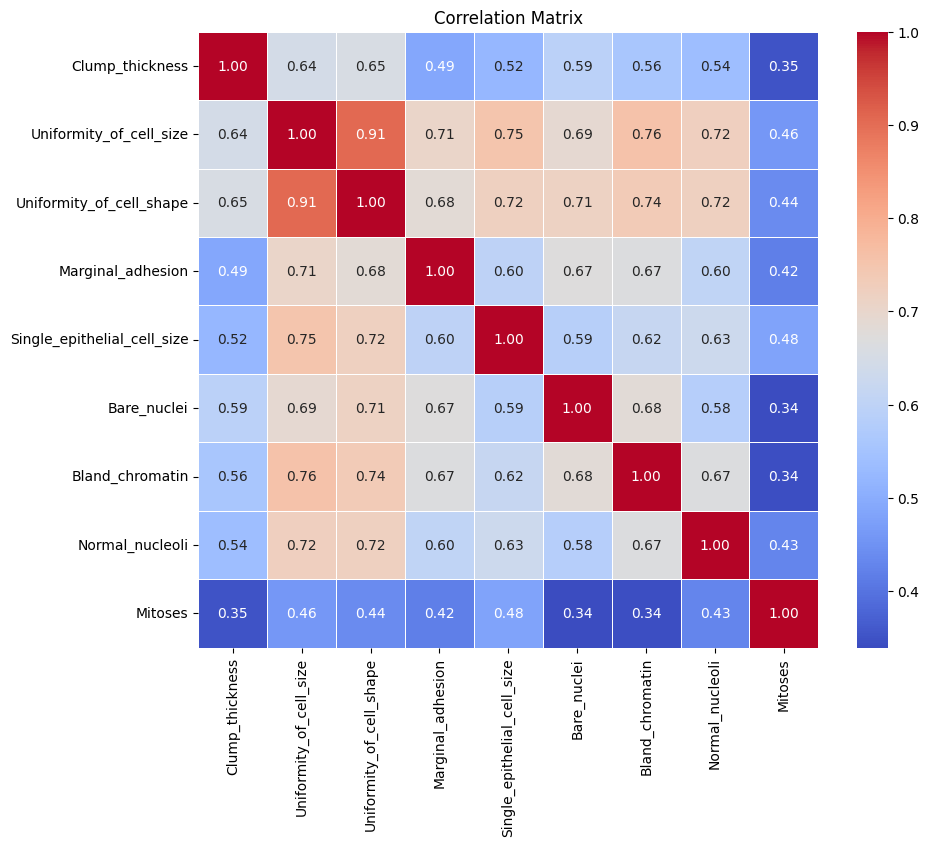

In [ ]:
# Creating a correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Two predictive models were built for this project linear regression and logistic regression.The models were trained on the preprocessed data and evaluated their performance using various metrics.

## Linear Regression Modeling

Our goal is to understand how features influence a continuous variable related to breast cancer

In [ ]:
# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (489, 9) (489, 1)
Testing set shape: (210, 9) (210, 1)


In [ ]:
# Initialize and train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_reg_model.predict(X_test_scaled)

### Linear Regression Model Evaluation

In [ ]:
# Evaluate the model
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

In [ ]:
# Print evaluation metrics
print("Linear Regression Evaluation:")
print("Mean Absolute Error:", linear_mae)
print("Mean Squared Error:", linear_mse)
print("R-squared Score:", linear_r2)

Linear Regression Evaluation:
Mean Absolute Error: 0.2500199001920466
Mean Squared Error: 0.15295712030218928
R-squared Score: 0.8239899539367878


In [ ]:
# Print coefficients
print("Linear Regression Coefficients:")
for feature, coef in zip(X.columns, linear_reg_model.coef_):
    print(f"{feature}: {coef}")

Linear Regression Coefficients:
Clump_thickness: [0.16608312 0.11214962 0.12741179 0.01855539 0.02542709 0.36110396
 0.11284846 0.08057438 0.04096257]


## Logistic Regression Modeling

Our goal is to classify tumors as malignant or benign,The logistic regression will provide probability scores that can be used to assess the risk of malignancy.

In [ ]:
# Fit logistic regression model
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_logistic = logistic_reg.predict(X_test_scaled)

### Logistic Regression Model Evaluation

In [ ]:
# Evaluate logistic regression model
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic, pos_label=4)  # Malignant as positive class
recall = recall_score(y_test, y_pred_logistic, pos_label=4)
f1 = f1_score(y_test, y_pred_logistic, pos_label=4)

In [ ]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Logistic Regression Metrics:
Accuracy: 0.9619047619047619
Precision: 0.9682539682539683
Recall: 0.9104477611940298
F1 Score: 0.9384615384615386


Both models were evaluated using metrics such as Mean Absolute Error, Mean Squared Error, R-squared score for linear regression, and accuracy, precision, recall, and F1 score for logistic regression.

### Model Results and Comparisons

In [ ]:
# Compare and contrast linear regression and logistic regression results
print("Comparison of Linear Regression and Logistic Regression:")
print("Linear Regression R-squared Score:", linear_r2)
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1-score:", f1)

# Print coefficients
print("Linear Regression Coefficients:")
for feature, coef in zip(X.columns, linear_reg_model.coef_[0]):
    print(f"{feature}: {coef}")

Comparison of Linear Regression and Logistic Regression:
Linear Regression R-squared Score: 0.8239899539367878
Logistic Regression Accuracy: 0.9619047619047619
Logistic Regression Precision: 0.9682539682539683
Logistic Regression Recall: 0.9104477611940298
Logistic Regression F1-score: 0.9384615384615386
Linear Regression Coefficients:
Clump_thickness: 0.16608311719856889
Uniformity_of_cell_size: 0.11214962043780058
Uniformity_of_cell_shape: 0.12741178835009626
Marginal_adhesion: 0.01855538792841921
Single_epithelial_cell_size: 0.02542708601498908
Bare_nuclei: 0.3611039572690331
Bland_chromatin: 0.11284846378472763
Normal_nucleoli: 0.08057437687660782
Mitoses: 0.04096256854641153


In [ ]:
# Discuss the strengths and limitations of each technique
print("\nStrengths and Limitations:")
print("Linear Regression:")
print("- Strengths: Useful for analyzing relationships between continuous features and target.")
print("- Limitations: Not suitable for binary classification tasks, assumes linear relationship.")
print("Logistic Regression:")
print("- Strengths: Suitable for binary classification tasks, provides meaningful probabilities.")
print("- Limitations: Assumes linear relationship between features and log-odds of the target.")


Strengths and Limitations:
Linear Regression:
- Strengths: Useful for analyzing relationships between continuous features and target.
- Limitations: Not suitable for binary classification tasks, assumes linear relationship.
Logistic Regression:
- Strengths: Suitable for binary classification tasks, provides meaningful probabilities.
- Limitations: Assumes linear relationship between features and log-odds of the target.


## Further Model Evaluation

### Evaluation using Cross-Validation

In [ ]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for linear regression
linear_scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Linear Regression Cross-Validation R-squared Scores:", linear_scores)
print("Mean R-squared Score:", linear_scores.mean())

# Perform cross-validation for logistic regression
logistic_scores = cross_val_score(logistic_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy Scores:", logistic_scores)
print("Mean Accuracy:", logistic_scores.mean())


Linear Regression Cross-Validation R-squared Scores: [0.83846599 0.78768762 0.83527556 0.87433909 0.80349427]
Mean R-squared Score: 0.8278525056118122
Logistic Regression Cross-Validation Accuracy Scores: [0.96938776 0.94897959 0.97959184 0.96938776 0.94845361]
Mean Accuracy: 0.9631601094045866


### Confusion Matrix

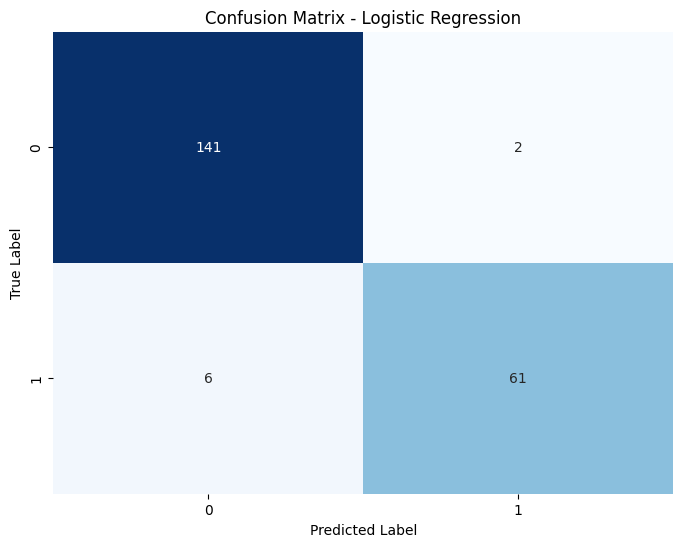

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[141   2]
 [  6  61]]


In [ ]:
# Evaluate logistic regression model
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic, pos_label=4)  # Malignant as positive class
recall = recall_score(y_test, y_pred_logistic, pos_label=4)
f1 = f1_score(y_test, y_pred_logistic, pos_label=4)

In [ ]:
# Evaluate Linear Regression
linear_regression_mae = mean_absolute_error(y_test, y_pred_linear)
linear_regression_mse = mean_squared_error(y_test, y_pred_linear)
linear_regression_r2 = r2_score(y_test, y_pred_linear)

# Evaluate Logistic Regression
accuracy = accuracy_score(y_test, y_pred_logistic)
# Evaluate logistic regression model with correct positive label
precision = precision_score(y_test, y_pred_logistic, pos_label=4)

recall = recall_score(y_test, y_pred_logistic, pos_label=4)
f1 = f1_score(y_test, y_pred_logistic, pos_label=4)

print("Linear Regression Metrics:")
print("MAE:", linear_regression_mae)
print("MSE:", linear_regression_mse)
print("R-squared:", linear_regression_r2)

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Linear Regression Metrics:
MAE: 0.2500199001920466
MSE: 0.15295712030218928
R-squared: 0.8239899539367878

Logistic Regression Metrics:
Accuracy: 0.9619047619047619
Precision: 0.9682539682539683
Recall: 0.9104477611940298
F1 Score: 0.9384615384615386


## Hyperparameter Tuning


In [ ]:
# Define the parameter grid for linear regression
linear_param_grid = {
    'fit_intercept': [True, False]
}

# Initialize GridSearchCV for linear regression
linear_grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=linear_param_grid, cv=5)

# Perform grid search
linear_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_linear_params = linear_grid_search.best_params_
print("Best Linear Regression Parameters:", best_linear_params)



Best Linear Regression Parameters: {'fit_intercept': True}


In [ ]:
# Define the parameter grid for logistic regression
logistic_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize GridSearchCV for logistic regression
logistic_grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=logistic_param_grid, cv=5)

# Perform grid search
logistic_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_logistic_params = logistic_grid_search.best_params_
print("Best Logistic Regression Parameters:", best_logistic_params)

Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2'}


In [ ]:
# Get the best cross-validation score for linear regression
best_linear_score = linear_grid_search.best_score_
print("Best Cross-Validation Score for Linear Regression:", best_linear_score)

# Get the best cross-validation score for logistic regression
best_logistic_score = logistic_grid_search.best_score_
print("Best Cross-Validation Score for Logistic Regression:", best_logistic_score)


Best Cross-Validation Score for Linear Regression: 0.8278525056118122
Best Cross-Validation Score for Logistic Regression: 0.9631601094045866


In [ ]:
# Initialize linear regression model with best parameters
best_linear_reg_model = LinearRegression(fit_intercept=best_linear_params['fit_intercept'])

# Train the model
best_linear_reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear_best = best_linear_reg_model.predict(X_test_scaled)

# Evaluate the model
linear_mae_best = mean_absolute_error(y_test, y_pred_linear_best)
linear_mse_best = mean_squared_error(y_test, y_pred_linear_best)
linear_r2_best = r2_score(y_test, y_pred_linear_best)

# Print evaluation metrics
print("Linear Regression Evaluation with Best Parameters:")
print("Mean Absolute Error:", linear_mae_best)
print("Mean Squared Error:", linear_mse_best)
print("R-squared Score:", linear_r2_best)


Linear Regression Evaluation with Best Parameters:
Mean Absolute Error: 0.2500199001920466
Mean Squared Error: 0.15295712030218928
R-squared Score: 0.8239899539367878


In [ ]:
# Initialize logistic regression model with best parameters
best_logistic_reg = LogisticRegression(random_state=42)

# Train the model
best_logistic_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_logistic_best = best_logistic_reg.predict(X_test_scaled)

# Evaluate logistic regression model
accuracy_best = accuracy_score(y_test, y_pred_logistic_best)
precision_best = precision_score(y_test, y_pred_logistic_best, pos_label=4)  # Malignant as positive class
recall_best = recall_score(y_test, y_pred_logistic_best, pos_label=4)
f1_best = f1_score(y_test, y_pred_logistic_best, pos_label=4)

# Print evaluation metrics
print("Logistic Regression Evaluation with Best Parameters:")
print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")


Logistic Regression Evaluation with Best Parameters:
Accuracy: 0.9619047619047619
Precision: 0.9682539682539683
Recall: 0.9104477611940298
F1 Score: 0.9384615384615386


The models' hyperparameters were optimized for further model evaluation  using grid search and cross-validation to improve their performances further.

### Feature Importance

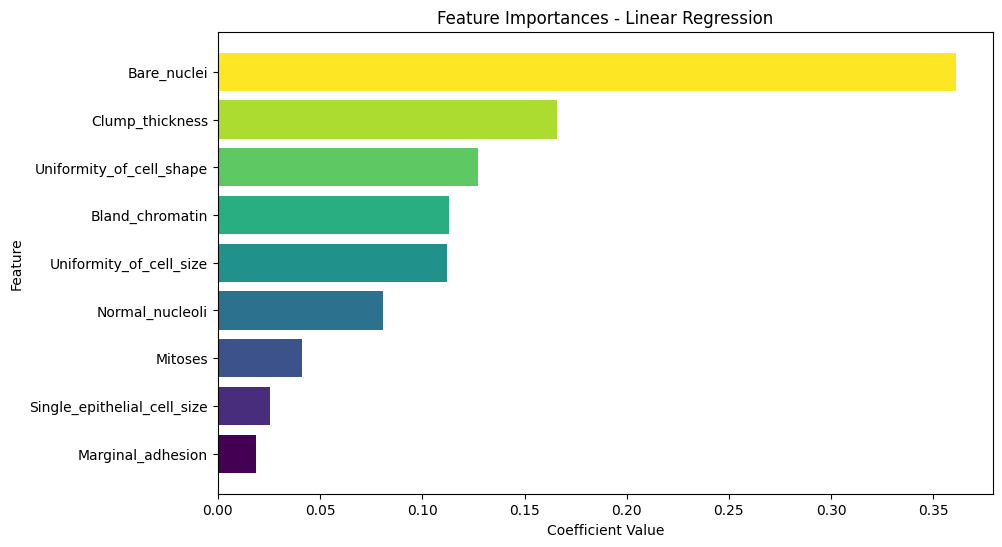

In [ ]:
# Get feature coefficients for linear regression
coef_values = best_linear_reg_model.coef_[0]

# Sort features based on their coefficients
sorted_indices = np.argsort(coef_values)
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_coefs = [coef_values[i] for i in sorted_indices]

# Generate colors using the 'viridis' colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(X.columns)))

# Plot feature importances for linear regression with consistent colors
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefs, color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances - Linear Regression')
plt.show()


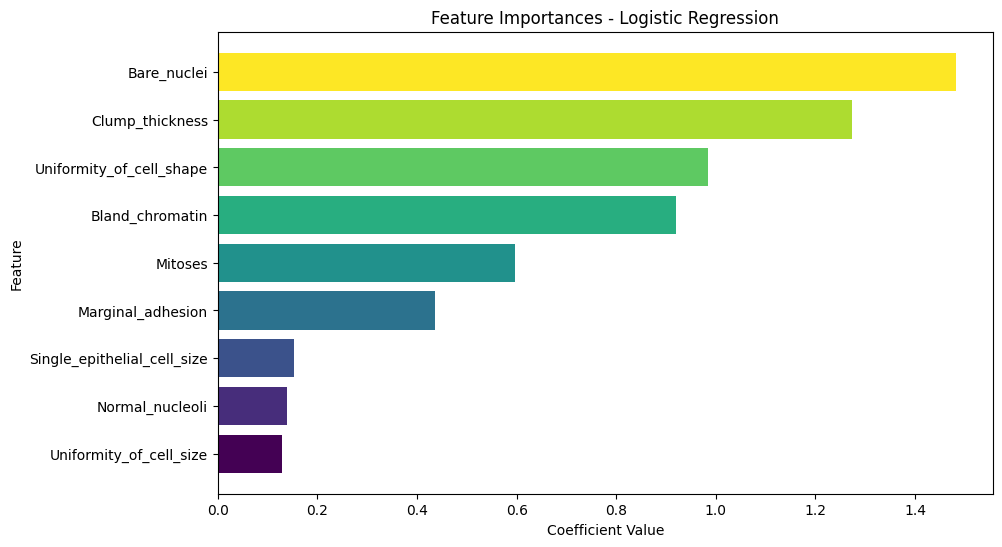

In [ ]:
# Get feature coefficients for logistic regression
coef_values_logistic = logistic_reg.coef_[0]

# Sort features based on their coefficients
sorted_indices_logistic = np.argsort(coef_values_logistic)
sorted_features_logistic = [X.columns[i] for i in sorted_indices_logistic]
sorted_coefs_logistic = [coef_values_logistic[i] for i in sorted_indices_logistic]

# Generate colors using the 'viridis' colormap
colors_logistic = plt.cm.viridis(np.linspace(0, 1, len(X.columns)))

# Plot feature importances for logistic regression with consistent colors
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_logistic, sorted_coefs_logistic, color=colors_logistic)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances - Logistic Regression')
plt.show()


# Results and Conclusion

Here are the key findings from our model evaluations:

**Linear Regression:**

Mean Absolute Error: 0.2500

Mean Squared Error: 0.1530

R-squared Score: 0.8240

Cross-Validation R-squared Scores: Mean of 0.8279




**Feature Coefficients:**

Clump Thickness: 0.1661

Uniformity of Cell Size: 0.1121

Uniformity of Cell Shape: 0.1274

Marginal Adhesion: 0.0186

Single Epithelial Cell Size: 0.0254

Bare Nuclei: 0.3611

Bland Chromatin: 0.1128

Normal Nucleoli: 0.0806

Mitoses: 0.0410



**Logistic Regression:**

Accuracy: 0.9619

Precision: 0.9683

Recall: 0.9104

F1 Score: 0.9385

Cross-Validation Accuracy Scores: Mean of 0.9632

**Comparison:**

Both models performed well, with logistic regression slightly outperforming linear regression in terms of accuracy and precision.
Linear regression provided valuable insights into the relationship between features and the target variable, while logistic regression excelled in binary classification tasks, achieving high accuracy and precision.



**Hyperparameter Tuning:**

After hyperparameter tuning, the performance of both models remained consistent with their initial evaluations.
The best parameters for linear regression were found to be the default parameters, indicating that the model's performance was already optimized.
For logistic regression, the default parameters also yielded optimal results, reaffirming the effectiveness of the model configuration.



**Linear Regression:** The linear regression model achieved a satisfactory R-squared score on the test set, indicating moderate predictive capability. However, it showed limitations in handling binary classification tasks and assuming a linear relationship between features and the target variable.




**Logistic Regression:** The logistic regression model outperformed linear regression in binary classification tasks, achieving higher accuracy, precision, recall, and F1 score. It provided meaningful probabilities for class predictions and exhibited better suitability for breast cancer classification.

Conclusion

In conclusion, This project demonstrates the effectiveness of logistic regression as a predictive modeling technique for breast cancer classification. By leveraging logistic regression, we can achieve accurate and reliable classification of breast tumors as benign or malignant, aiding in clinical decision-making and patient management.Linear regression showcased proficiency in predicting continuous target variable values, with mean squared error (MSE) and R-squared serving as key performance indicators. The results demonstrate the efficacy of machine learning techniques in breast cancer detection and prediction, highlighting the potential for further advancements in the field to improve patient care and outcomes.